<a href="https://colab.research.google.com/github/sammainahkinya1404/Tensorflow-CNN-model/blob/main/New_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, print_function,division, unicode_literals

import os.path
import glob
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation
from keras import regularizers
import keras
import os
import matplotlib.pyplot as plt
import numpy as np
import pathlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [ ]:
print(os.listdir("/content/drive/MyDrive/Diseazes/train"))
print(os.listdir("/content/drive/MyDrive/Diseazes/validation"))
print(os.listdir("/content/drive/MyDrive/Diseazes/test"))

['Salmonella', 'Coccidiosis', 'Healthy', 'Newcastle']
['Coccidiosis', 'Salmonella', 'Newcastle', 'Healthy']
['Healthy', 'Newcastle', 'Salmonella', 'Coccidiosis']


In [ ]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [ ]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + 'bytes')

In [ ]:
'''
train_dir = '/content/drive/MyDrive/Diseazes/train'
test_dir = '/content/drive/MyDrive/Diseazes/test'
valid_dir = '/content/drive/MyDrive/Diseazes/validation'
'''

"\ntrain_dir = '/content/drive/MyDrive/Diseazes/train'\ntest_dir = '/content/drive/MyDrive/Diseazes/test'\nvalid_dir = '/content/drive/MyDrive/Diseazes/validation'\n"

In [ ]:
data_dir = '/content/drive/MyDrive/Diseazes'
data_dir = pathlib.Path(data_dir)
CLASS_NAMES = ['Coccidiosis','Healthy','Newcastle','Salmonella']
print("Class names", CLASS_NAMES)

Class names ['Coccidiosis', 'Healthy', 'Newcastle', 'Salmonella']


In [ ]:
for cl in CLASS_NAMES:
    data_path = os.path.join(data_dir, cl)
    images = glob.glob(data_path + "/*")
    print("{} :{} ".format(cl,len(images)))
    train, val = images[:round(len(images)*0.8)],images[round(len(images)*0.8):]
    
    for t in train:
        if not os.path.exists(os.path.join(data_dir, 'train', cl)):
            os.makedirs(os.path.join(data_dir, 'train', cl))
        shutil.move(t,os.path.join(data_dir, 'train', cl))
        
    for v in val:
        if not os.path.exists(os.path.join(data_dir, 'validation', cl)):
            os.makedirs(os.path.join(data_dir, 'valdation', cl))
        shutil.move(v,os.path.join(data_dir, 'validation', cl))
    
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'validation')

Coccidiosis :0 
Healthy :0 
Newcastle :0 
Salmonella :0 


In [ ]:
classes = os.listdir(train_dir)
print('classes: ', classes)

classes:  ['Salmonella', 'Coccidiosis', 'Healthy', 'Newcastle']


In [ ]:
IMG_HEIGHT = 224
IMG_WIDTH  = 224
BATCH_SIZE = 32

In [ ]:
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

train_data_gen = image_train_gen.flow_from_directory(train_dir,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     class_mode='sparse')

img_valid_gen = ImageDataGenerator(rescale=1./255)
valid_data_gen = img_valid_gen.flow_from_directory(valid_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                               class_mode='sparse')

Found 3547 images belonging to 4 classes.
Found 522 images belonging to 4 classes.


In [ ]:
def displayImages(img_arr):
    fig,axes = plt.subplots(1,5,figsize=(15,15))
    axes = axes.flatten()
    for img, ax in zip(img_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

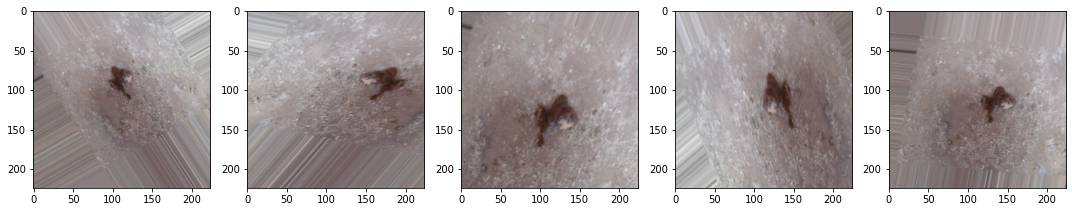

In [ ]:
img_array = [train_data_gen[0][0][0] for i in range(5)]
displayImages(img_array)

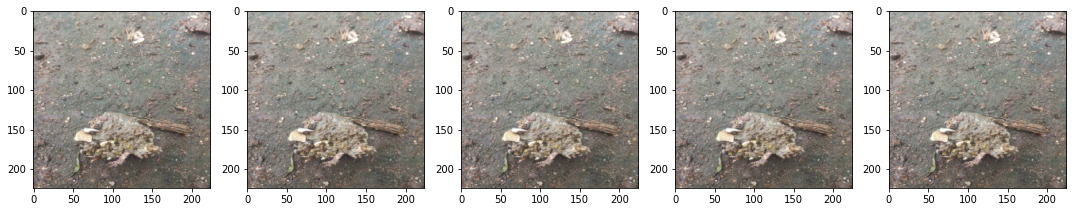

In [ ]:
img_array  = [valid_data_gen[0][0][0] for i in range(5)]
displayImages(img_array)

In [ ]:
def getInfo(generator):
    print("Samples:",generator.samples)
    print("No of classes:",generator.num_classes)
    print("Batch size:", generator.batch_size)
    print("Data format:", generator.dtype)
    print("Color mode:",generator.color_mode)
    print("Image shape:", generator.image_shape)
    print("Allowed class modes:", generator.allowed_class_modes)
    print("Class Mode:", generator.class_mode)

In [ ]:
getInfo(train_data_gen)

Samples: 3547
No of classes: 4
Batch size: 32
Data format: float32
Color mode: rgb
Image shape: (224, 224, 3)
Allowed class modes: {'categorical', None, 'sparse', 'input', 'binary'}
Class Mode: sparse


In [ ]:
getInfo(valid_data_gen)

Samples: 522
No of classes: 4
Batch size: 32
Data format: float32
Color mode: rgb
Image shape: (224, 224, 3)
Allowed class modes: {'categorical', None, 'sparse', 'input', 'binary'}
Class Mode: sparse


In [ ]:
import glob
classes = len(glob.glob(train_dir+"/*"))

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(32,32,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="softmax"))

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 2, 2, 64)        

In [ ]:
EPOCHS=10
history=model.fit(
    train_data_gen,
 epochs=EPOCHS,
 validation_data=valid_data_gen
    
)

Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
export_dir = 'saved_model/1'

tf.saved_model.save(model, export_dir)

In [ ]:
mode = "Default" #@param ["Default", "Storage", "Speed"]

if mode == 'Storage':
  optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
  optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
  optimization = tf.lite.Optimize.DEFAULT
  
optimization

In [ ]:

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [optimization]
tflite_model = converter.convert()

In [ ]:
tflite_model_file = 'model.tflite'

with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)

with open('labels.txt', 'w') as f:
  f.write('\n'.join(CLASS_NAMES))